# 1. Autoencoder 

3분 딥러닝 책 정리

- 비지도 학습에서 널리 쓰이는 신경망

- 입력값과 출력값을 같게 하는 신경망

- 가운데 계층의 노드 수가 입력값보다 적은 것이 특징

- 입력데이터를 압축하는 효과를 얻게되며 노이즈 제거에도 효과적

- 입력층 데이터를 인코더를 통해 은닉층으로 내보내고, 은닉층 데이터를 디코더를 통해 출력으로 내보낸 뒤, 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는것

- 변이형 오토인코더(Variational Autoencoder), 잡음제거 인코더(Denoising Autoencoder) 등

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  0.0627
Epoch: 0002 Avg. cost =  0.0349
Epoch: 0003 Avg. cost =  0.0300
Epoch: 0004 Avg. cost =  0.0275
Epoch: 0005 Avg. cost =  0.0257
Epoch: 0006 Avg. cost =  0.0246
Epoch: 0007 Avg. cost =  0.0241
Epoch: 0008 Avg. cost =  0.0233
Epoch: 0009 Avg. cost =  0.0227
Epoch: 0010 Avg. cost =  0.0224
Epoch: 0011 Avg. cost =  0.0222
Epoch: 0012 Avg. cost =  0.0220
Epoch: 0013 Avg. cost =  0.0218
Epoch: 0014 Avg. cost =  0.0214
Epoch: 0015 Avg. cost =  0.0211
Epoch: 0016 Avg. cost =  0.0210
Epoch: 0017 Avg. cost =  0.02

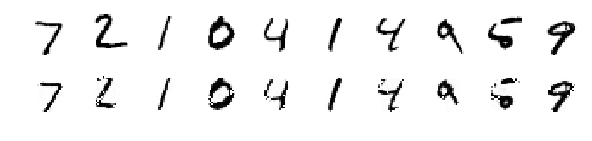

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X =  tf.placeholder(tf.float32,[None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode =  tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode =  tf.Variable(tf.random_normal([n_hidden]))

# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode),b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode),b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _,cost_val =  sess.run([optimizer, cost], feed_dict={X:batch_xs})
    total_cost += cost_val
    
  print('Epoch:','%04d' % (epoch + 1),'Avg. cost = ','{:.4f}'.format(total_cost / total_batch))
  
print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})

fig, ax =  plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i],(28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
  
plt.show()

# 1-1. Convolutional Autoencoder (CAE)

![대체 텍스트](https://i.imgur.com/q00uX4g.png)

출처 : http://elidavid.com/pubs/deeppainter.pdf

전통적인 CNN 구조는 위와 같습니다.

위의 논문은 Unpooling이란 기법을 이용하여서 이러한 CNN구조를 Autoencoder와 응용하려고 합니다.

![대체 텍스트](https://i.imgur.com/p3l3j6A.png)

출처 : http://elidavid.com/pubs/deeppainter.pdf

max pooling할 시 최대값의 자리를 기억하고 그자리에 압축된 차원을 다시 풀어내는 과정이라고 저는 이해하였습니다.

![대체 텍스트](https://i.imgur.com/KgdWKFB.png)

출처 : https://arxiv.org/pdf/1505.04366.pdf

deconvolution을 찾다가 위와 같이 동작한다는 것을 대략적으로 알게되었습니다.

[what-are-deconvolutional-layers](https://datascience.stackexchange.com/questions/6107/what-are-deconvolutional-layers)

위의 링크를 참고하다보면 결국 deconvolutional-layers는 역으로 padding을 주어서 차원을 늘리는 것으로 이해하게 되었습니다.

![대체 텍스트](https://i.imgur.com/Jlva4gy.png)

출처 : http://elidavid.com/pubs/deeppainter.pdf

uppooling과 deconvolution을 이용하여 autoencoder와 같이 동일한 이미지를 구현하는 것도 가능해지게 됩니다.

![대체 텍스트](https://i.imgur.com/nPnBwr6.png)

출처 : https://arxiv.org/pdf/1505.04366.pdf

위의 논문처럼 물체의 특징을 더욱 명확하게 잡아주기도 합니다.

![대체 텍스트](https://i.imgur.com/awAjYXA.png)

출처 : https://arxiv.org/pdf/1505.04366.pdf

전의 사용했던 방법보다 더 명확하게 윤곽 등을 잡아줌을 보실 수 있습니다.

Convolutional Autoencoder를 응용한 예는 아래와 같습니다.

https://github.com/alexjc/neural-enhance#1-examples--usage

CSI영화에서나 볼것 같던 저화질 사진을 고화질로 만들기!

https://github.com/richzhang/colorization

흑백사진을 컬러사진으로 만드는 것!

# 2. GAN (Generative Adversarial Network)

3분 딥러닝 정리

- 서로 대립(adversarial)하는 두 신경망을 경쟁시켜가며 결과물 생성 방법을 학습

- GAN 비유 : 위조지폐범(생성자)과 경찰(구분자)에 대한 이야기. 위조지폐범은 경찰을 최대한 속이려고 노력하고, 경찰은 위조한 지폐를 최대한 감별하려고 노력한다는 이야기.

- 위조지폐를 만들고 감별하려는 경쟁을 통해 서로의 능력이 발전하게 되고, 그러다 보면 결국 위조지폐범은 진짜와 거의 구분할 수 없을 정도로 진짜 같은 위조지폐를 만들 수 있게 된다.

![대체 텍스트](https://i.imgur.com/WI9qPYr.png)

GAN의 기본 구조

- 실제 이미지를 주고 구분자(Discriminator)에게 이미지가 진짜임을 판단하게 함.

- 그런 다음 생성자(Generator)를 통해 노이즈로부터 임의의 이미지를 만들고 이것을 다시 같은 구분자를 통해 진짜 이미지인지를 판단하게 함.

- 이렇게 생성자는 구분자를 속여 진짜처럼 보이게하고, 구분자는 생성사가 만든 이미지를 최대한 가짜라고 구분하도록 훈련하는 것이 GAN의 핵심

In [10]:
# 2016년에 가장 관심을 많이 받았던 비감독(Unsupervised) 학습 방법인
# Generative Adversarial Network(GAN)을 구현해봅니다.
# https://arxiv.org/abs/1406.2661
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

#########
# 신경망 모델 구성
######
# GAN 도 Unsupervised 학습이므로 Autoencoder 처럼 Y 를 사용하지 않습니다.
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈 Z를 입력값으로 사용합니다.
Z = tf.placeholder(tf.float32, [None, n_noise])

# 생성기 신경망에 사용하는 변수들입니다.
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망에 사용하는 변수들입니다.
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값입니다.
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))


# 생성기(G) 신경망을 구성합니다.
def generator(noise_z):
    hidden = tf.nn.relu(
                    tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, G_W2) + G_b2)

    return output


# 판별기(D) 신경망을 구성합니다.
def discriminator(inputs):
    hidden = tf.nn.relu(
                    tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, D_W2) + D_b2)

    return output


# 랜덤한 노이즈(Z)를 만듭니다.
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))


# 노이즈를 이용해 랜덤한 이미지를 생성합니다.
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구합니다.
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구합니다.
D_real = discriminator(X)

# 논문에 따르면, GAN 모델의 최적화는 loss_G 와 loss_D 를 최대화 하는 것 입니다.
# 다만 loss_D와 loss_G는 서로 연관관계가 있기 때문에 두 개의 손실값이 항상 같이 증가하는 경향을 보이지는 않을 것 입니다.
# loss_D가 증가하려면 loss_G는 하락해야하고, loss_G가 증가하려면 loss_D는 하락해야하는 경쟁관계에 있기 때문입니다.
# 논문의 수식에 따른 다음 로직을 보면 loss_D 를 최대화하기 위해서는 D_gene 값을 최소화하게 됩니다.
# 판별기에 진짜 이미지를 넣었을 때에도 최대값을 : tf.log(D_real)
# 가짜 이미지를 넣었을 때에도 최대값을 : tf.log(1 - D_gene)
# 갖도록 학습시키기 때문입니다.
# 이것은 판별기는 생성기가 만들어낸 이미지가 가짜라고 판단하도록 판별기 신경망을 학습시킵니다.
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
# 반면 loss_G 를 최대화하기 위해서는 D_gene 값을 최대화하게 되는데,
# 이것은 가짜 이미지를 넣었을 때, 판별기가 최대한 실제 이미지라고 판단하도록 생성기 신경망을 학습시킵니다.
# 논문에서는 loss_D 와 같은 수식으로 최소화 하는 생성기를 찾지만,
# 결국 D_gene 값을 최대화하는 것이므로 다음과 같이 사용할 수 있습니다.
loss_G = tf.reduce_mean(tf.log(D_gene))

# loss_D 를 구할 때는 판별기 신경망에 사용되는 변수만 사용하고,
# loss_G 를 구할 때는 생성기 신경망에 사용되는 변수만 사용하여 최적화를 합니다.
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줍니다.
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,
                                                         var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,
                                                         var_list=G_var_list)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습시킵니다.
        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('drive/sample/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)

print('최적화 완료!')

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0000 D loss: -0.5558 G loss: -2.002
Epoch: 0001 D loss: -0.5231 G loss: -2.208
Epoch: 0002 D loss: -0.1094 G loss: -3.621
Epoch: 0003 D loss: -0.4748 G loss: -1.641
Epoch: 0004 D loss: -0.2574 G loss: -2.2
Epoch: 0005 D loss: -0.4035 G loss: -2.358
Epoch: 0006 D loss: -0.2761 G loss: -2.291
Epoch: 0007 D loss: -0.2453 G loss: -2.965
Epoch: 0008 D loss: -0.5022 G loss: -2.252
Epoch: 0009 D loss: -0.3237 G loss: -2.639
Epoch: 0010 D loss: -0.4251 G loss: -1.969
Epoch: 0011 D loss: -0.5817 G loss: -2.035
Epoch: 0012 D loss: -0.4711 G loss: -2.031
Epoch: 0013 D loss: -0.4874 G loss: -2.197
Epoch: 0014 D loss: -0.4399 G loss: -2.377
Epoch: 0015 D loss: -0.5376 G loss: -2.084
Epoch: 0016 D loss: -0.4366 G loss: -2.166
Epoch: 0017 D loss: -0.5343 G loss: -2.478
Epoch: 0018 D loss: -0.569

Epoch: 0063 D loss: -0.8811 G loss: -1.76
Epoch: 0064 D loss: -0.8577 G loss: -1.619
Epoch: 0065 D loss: -0.8113 G loss: -1.961
Epoch: 0066 D loss: -0.8002 G loss: -1.749
Epoch: 0067 D loss: -0.6915 G loss: -1.787
Epoch: 0068 D loss: -0.7332 G loss: -1.863
Epoch: 0069 D loss: -0.7654 G loss: -1.899
Epoch: 0070 D loss: -0.7906 G loss: -1.975
Epoch: 0071 D loss: -0.7264 G loss: -1.835
Epoch: 0072 D loss: -0.6903 G loss: -1.975
Epoch: 0073 D loss: -0.8463 G loss: -1.705
Epoch: 0074 D loss: -0.8756 G loss: -1.732
Epoch: 0075 D loss: -0.7775 G loss: -1.792
Epoch: 0076 D loss: -0.8721 G loss: -1.79
Epoch: 0077 D loss: -0.6937 G loss: -2.054
Epoch: 0078 D loss: -0.941 G loss: -1.997
Epoch: 0079 D loss: -0.8532 G loss: -1.897
Epoch: 0080 D loss: -0.6867 G loss: -1.87
Epoch: 0081 D loss: -0.8426 G loss: -1.668
Epoch: 0082 D loss: -0.7468 G loss: -1.869
Epoch: 0083 D loss: -0.7337 G loss: -1.86
Epoch: 0084 D loss: -0.7979 G loss: -1.863
Epoch: 0085 D loss: -0.8709 G loss: -1.823
Epoch: 0086 D lo

결과값

![대체 텍스트](https://i.imgur.com/gtCyHOW.gif)

![대체 텍스트](https://i.imgur.com/fsBGRqb.png)

In [11]:
# GAN 모델을 이용해 단순히 랜덤한 숫자를 생성하는 아닌,
# 원하는 손글씨 숫자를 생성하는 모델을 만들어봅니다.
# 이런 방식으로 흑백 사진을 컬러로 만든다든가, 또는 선화를 채색한다든가 하는 응용이 가능합니다.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

tf.reset_default_graph() 

#########
# 옵션 설정
######
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용합니다.
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])


def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보를 추가합니다.
        inputs = tf.concat([noise, labels], 1)

        # TensorFlow 에서 제공하는 유틸리티 함수를 이용해 신경망을 매우 간단하게 구성할 수 있습니다.
        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input,
                                 activation=tf.nn.sigmoid)

    return output


def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해,
        # 이전에 사용되었던 변수를 재사용하도록 합니다.
        if reuse:
            scope.reuse_variables()

        inputs = tf.concat([inputs, labels], 1)

        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1,
                                 activation=None)

    return output


def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

# 생성 모델과 판별 모델에 Y 즉, labels 정보를 추가하여
# labels 정보에 해당하는 이미지를 생성할 수 있도록 유도합니다.
G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

# 손실함수는 다음을 참고하여 GAN 논문에 나온 방식과는 약간 다르게 작성하였습니다.
# http://bamos.github.io/2016/08/09/deep-completion/
# 진짜 이미지를 판별하는 D_real 값은 1에 가깝도록,
# 가짜 이미지를 판별하는 D_gene 값은 0에 가깝도록 하는 손실 함수입니다.
loss_D_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.zeros_like(D_gene)))
# loss_D_real 과 loss_D_gene 을 더한 뒤 이 값을 최소화 하도록 최적화합니다.
loss_D = loss_D_real + loss_D_gene
# 가짜 이미지를 진짜에 가깝게 만들도록 생성망을 학습시키기 위해, D_gene 을 최대한 1에 가깝도록 만드는 손실함수입니다.
loss_G = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.ones_like(D_gene)))

# TensorFlow 에서 제공하는 유틸리티 함수를 이용해
# discriminator 와 generator scope 에서 사용된 변수들을 쉽게 가져올 수 있습니다.
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,
                                            var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,
                                            var_list=vars_G)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Y: batch_ys, Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G,
                           feed_dict={Y: mnist.test.labels[:sample_size],
                                      Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('drive/samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)

print('최적화 완료!')

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0000 D loss: 0.008381 G loss: 7.819
Epoch: 0001 D loss: 0.002816 G loss: 8.38
Epoch: 0002 D loss: 0.004621 G loss: 8.365
Epoch: 0003 D loss: 0.02734 G loss: 7.128
Epoch: 0004 D loss: 0.05892 G loss: 5.778
Epoch: 0005 D loss: 0.04257 G loss: 7.798
Epoch: 0006 D loss: 0.07385 G loss: 5.412
Epoch: 0007 D loss: 0.1051 G loss: 7.021
Epoch: 0008 D loss: 0.08916 G loss: 6.726
Epoch: 0009 D loss: 0.121 G loss: 5.985
Epoch: 0010 D loss: 0.1702 G loss: 5.48
Epoch: 0011 D loss: 0.1457 G loss: 5.325
Epoch: 0012 D loss: 0.3287 G loss: 4.135
Epoch: 0013 D loss: 0.3641 G loss: 4.339
Epoch: 0014 D loss: 0.3754 G loss: 4.196
Epoch: 0015 D loss: 0.4576 G loss: 4.049
Epoch: 0016 D loss: 0.3181 G loss: 3.975
Epoch: 0017 D loss: 0.4755 G loss: 3.883
Epoch: 0018 D loss: 0.5816 G loss: 3.482
Epoch: 0019

Epoch: 0064 D loss: 0.781 G loss: 1.901
Epoch: 0065 D loss: 0.776 G loss: 1.824
Epoch: 0066 D loss: 0.8589 G loss: 1.757
Epoch: 0067 D loss: 0.8871 G loss: 1.842
Epoch: 0068 D loss: 0.8163 G loss: 1.941
Epoch: 0069 D loss: 0.8028 G loss: 1.93
Epoch: 0070 D loss: 0.7555 G loss: 2.299
Epoch: 0071 D loss: 0.6915 G loss: 1.749
Epoch: 0072 D loss: 0.7556 G loss: 2.059
Epoch: 0073 D loss: 0.8928 G loss: 1.804
Epoch: 0074 D loss: 0.5796 G loss: 2.053
Epoch: 0075 D loss: 0.7524 G loss: 2.198
Epoch: 0076 D loss: 0.6148 G loss: 2.297
Epoch: 0077 D loss: 0.8725 G loss: 2.054
Epoch: 0078 D loss: 0.6748 G loss: 2.139
Epoch: 0079 D loss: 0.6214 G loss: 2.029
Epoch: 0080 D loss: 0.8045 G loss: 1.854
Epoch: 0081 D loss: 0.8058 G loss: 2.216
Epoch: 0082 D loss: 0.8828 G loss: 1.685
Epoch: 0083 D loss: 0.5637 G loss: 2.233
Epoch: 0084 D loss: 0.6604 G loss: 2.062
Epoch: 0085 D loss: 0.8072 G loss: 1.908
Epoch: 0086 D loss: 0.7107 G loss: 1.955
Epoch: 0087 D loss: 0.764 G loss: 2.233
Epoch: 0088 D loss: 

실행결과

![대체 텍스트](https://i.imgur.com/3RS0X9c.gif)

### GAN 응용

https://arxiv.org/pdf/1611.07004v1.pdf

image-to-image 변환

![대체 텍스트](https://i.imgur.com/vi0aEKx.png)

출처 : https://arxiv.org/pdf/1611.07004v1.pdf

Paints Chainer

http://paintschainer.preferred.tech/index_en.html

![대체 텍스트](https://i.imgur.com/eflNgrA.png)

출처 : https://github.com/pfnet/PaintsChainer

GAN 이론 참고

http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html

http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-2.html

# 2-1. GAN 더 이해해보기

![대체 텍스트](https://i.imgur.com/oi8phoL.png)

출처 : https://arxiv.org/pdf/1406.2661.pdf

초록색 선이 가짜 값이고 검은 도트 선이 진짜 값입니다. 초록색 도트 선은 구분자입니다.

초록색 선을 보시면 가짜의 값이 처음에는 아예 맞지 않다가 점점 구분자를 통해서 가짜값이 점점 진짜의 값과 거의 구분할 수 없는 정도의 값이 되어간다고 설명해주고 있습니다.

구분자의 선은 0-1사이의 확률의 그래프라고 보시면 될거 같습니다.

위의 과정 참고 동영상 url : https://youtu.be/0r3g7-4bMYU

![대체 텍스트](https://i.imgur.com/fz4F2p7.png)

원본 이미지 출처 : https://arxiv.org/pdf/1406.2661.pdf

G(Generator)는 생성용 벡터 z로부터 데이터를 생성

D(Discriminator)는 대상 데이터가 진짜(데이터 세트)인가 가짜(G에 의해 생성)를 식별 

![대체 텍스트](https://i.imgur.com/etwzVQU.png)

원본 이미지 출처 : https://arxiv.org/pdf/1406.2661.pdf

discriminator object function(loss)

![대체 텍스트](https://i.imgur.com/JkWwfif.png)

원본 이미지 출처 : https://arxiv.org/pdf/1406.2661.pdf

generator object function

제 식대로 논문에 나온 수식을 이해하자면 서로 값을 크게하는 목표 / 값을 작게하는 목표 라는 상반된 목표를 가졌기에

위조지폐범(생성자)과 경찰(구분자)에 대한 이야기. 위조지폐범은 경찰을 최대한 속이려고 노력하고, 경찰은 위조한 지폐를 최대한 감별하려고 노력한다는 비유가 어느 정도는 이해가 되는듯 싶습니다.

# 2-2. GAN 응용

https://github.com/Crpediem/icml2016

Generative Adversarial Text-to-Image Synthesis

http://mattya.github.io/chainer-DCGAN/

chainer-DCGAN

# 2-3. DCGAN (Deep Convolutional Generative Adversarial Nets)

![대체 텍스트](https://i.imgur.com/dahVLr4.png)

출처 : https://arxiv.org/pdf/1511.06434.pdf

기존의 GAN과 DCGAN의 차이점은 fully-connected 가 CNN 구조로 대체된 것이 차별점입니다.

(DCGAN의 전체이름이 Deep Convolutional Generative Adversarial Nets도 바로 이런 이유가 아닌가 싶습니다.)

![대체 텍스트](https://i.imgur.com/5eOVjDE.png)

출처 : https://arxiv.org/pdf/1511.06434.pdf

다섯번 에폭시를 돌려 학습한 후 생성된 침실 사진이라고 합니다.

https://github.com/znxlwm/tensorflow-MNIST-GAN-DCGAN

mnist를 GAN과 DCGAN을 비교한 결과인데요 DCGAN이 epoch이 적더라도 더 좋은 결과를 보여줌을 보실 수 있습니다.

![대체 텍스트](https://i.imgur.com/kf6vJhJ.png)

출처 : https://arxiv.org/pdf/1511.06434.pdf

또한 DCGAN을 통해서 사진에서 일정한 특징을 뽑아서 다른 사진에 그 특징을 더할 수 있음을 논문에서는 보여주고 있습니다.

(위의 이미지들도 다 DCGAN으로 생성된 가짜 이미지들입니다.)

# 2-4. 그 외 GAN 종류들

- infoGAN : https://arxiv.org/pdf/1606.03657.pdf, https://medium.com/emergent-future/learning-interpretable-latent-representations-with-infogan-dd710852db46, https://wiseodd.github.io/techblog/2017/01/29/infogan/

- ConditionalGAN : https://arxiv.org/pdf/1411.1784.pdf, http://t-lab.tistory.com/29

- Wasserstein GAN : https://arxiv.org/pdf/1701.07875.pdf, https://tensorflow.blog/2017/02/06/wasserstein-gan-1701-07875/

- Least Squares GAN : https://arxiv.org/pdf/1611.04076v2.pdf, http://jaejunyoo.blogspot.com/2017/03/lsgan-1.html, https://wiseodd.github.io/techblog/2017/03/02/least-squares-gan/

- Energy Based GAN :  https://arxiv.org/pdf/1609.03126.pdf, http://jaejunyoo.blogspot.com/2018/02/energy-based-generative-adversarial-nets-1.html

- f-GAN : https://arxiv.org/pdf/1606.00709.pdf, http://jaejunyoo.blogspot.com/2017/06/f-gan.html

- DiscoGAN : https://arxiv.org/pdf/1703.05192.pdf, https://github.com/ilguyi/discoGAN.tensorflow.slim, https://angrypark.github.io/DiscoGAN-paper-reading/

- CycleGAN : https://github.com/junyanz/CycleGAN, https://arxiv.org/pdf/1703.10593.pdf, https://taeoh-kim.github.io/blog/gan%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-image-to-image-translation-pix2pix-cyclegan-discogan/

- Boundary Equilibrium GAN : https://arxiv.org/pdf/1703.10717.pdf, http://jaejunyoo.blogspot.com/2017/04/began-boundary-equilibrium-gan-1.html